# 📘 NeuroTradeX Starter Notebook
This notebook helps you explore and engineer features for your autonomous trading engine using historical stock data.


In [8]:
# 📦 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## 🔍 Load Dataset
Adjust the path to your `stock_prices.csv` or equivalent historical data file.

In [9]:
# Replace with your actual path
df = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=['Date'])
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


## 📊 Basic EDA

In [10]:
# Check for missing values
df.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

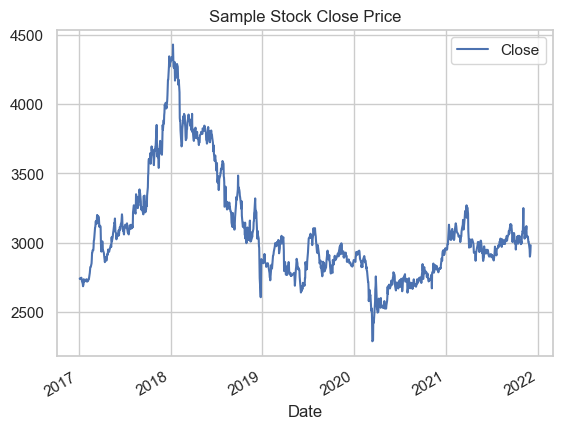

In [11]:
# Plot closing price for a sample stock
sample_stock = df[df['SecuritiesCode'] == df['SecuritiesCode'].unique()[0]]
sample_stock.plot(x='Date', y='Close', title='Sample Stock Close Price')
plt.show()

## 🧠 Feature Engineering

In [12]:
# Sort for time series
df = df.sort_values(by=['SecuritiesCode', 'Date'])

# Feature: Daily return (fixed for future compatibility)
df['Return'] = df.groupby('SecuritiesCode')['Close'].pct_change(fill_method=None)

# Feature: 5-day and 10-day moving averages
df['MA_5'] = df.groupby('SecuritiesCode')['Close'].transform(lambda x: x.rolling(5).mean())
df['MA_10'] = df.groupby('SecuritiesCode')['Close'].transform(lambda x: x.rolling(10).mean())

# Feature: Rolling volatility (std deviation)
df['Volatility_5'] = df.groupby('SecuritiesCode')['Return'].transform(lambda x: x.rolling(5).std())
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Return,MA_5,MA_10,Volatility_5
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,NaN,NaN,NaN,NaN
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,-0.001459,NaN,NaN,NaN
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,0.000730,NaN,NaN,NaN
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,0.002920,NaN,NaN,NaN
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,-0.001092,2742.6,NaN,NaN


## 📈 Next Steps
- Add more features (MACD, RSI, etc.)
- Train a prediction model (e.g., XGBoost)
- Rank stocks based on predicted return
- Evaluate using Sharpe Ratio
- Integrate with your execution system